# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


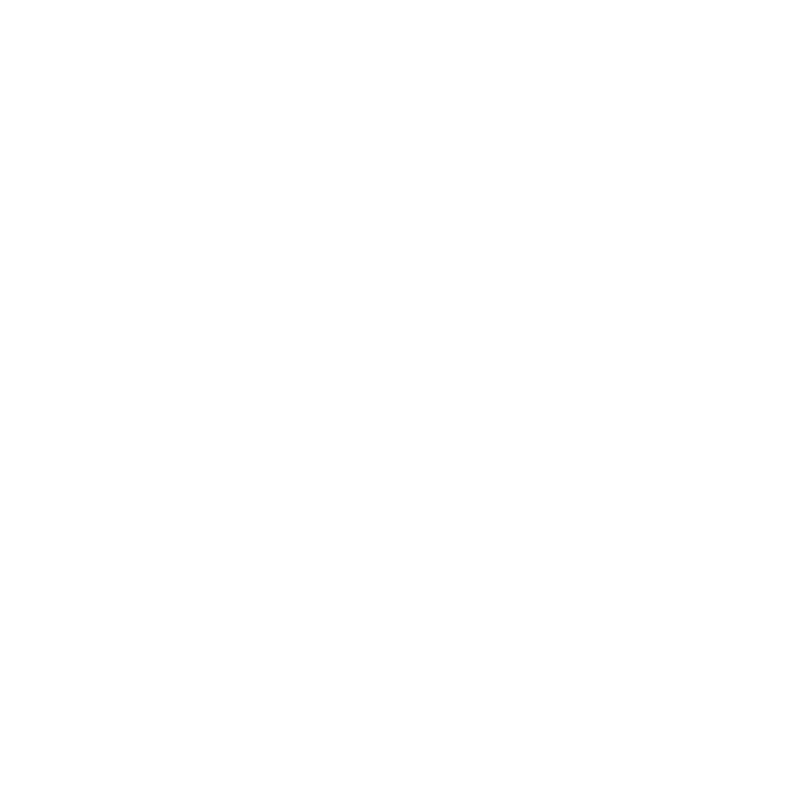

In [32]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


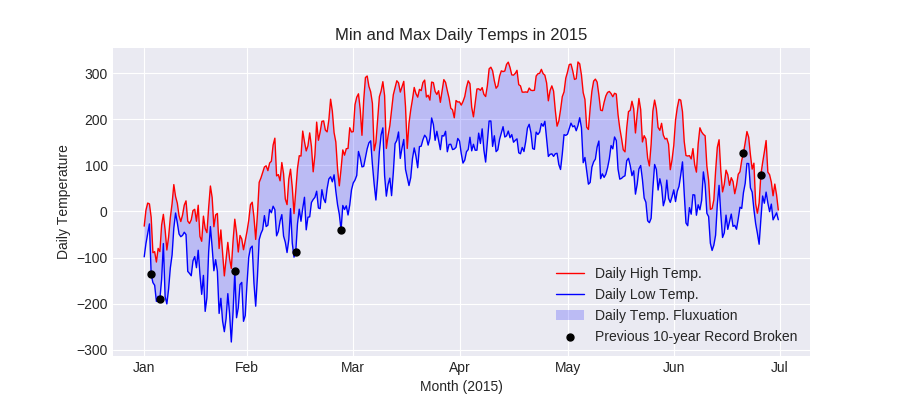

([<matplotlib.axis.XTick at 0x7fb6ca02b2b0>,
 <a list of 7 Text xticklabel objects>)

In [39]:
import numpy as np
%matplotlib notebook
weather_df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
weather_df

#--------------------------------> Prepare the data
#Sort into separate dataframe for min and max temps
weather_df_max = weather_df[['Date', 'Data_Value']][weather_df['Element'] == 'TMAX']
weather_df_min = weather_df[['Date', 'Data_Value']][weather_df['Element'] == 'TMIN']

#Since there is data from multiple sites, we get the mean daily temps across all sites
weather_df_max = weather_df_max.groupby('Date').mean().reset_index()
weather_df_min = weather_df_min.groupby('Date').mean().reset_index()

#Create a DF for 2015 data only, since this will be plotted as a line
weather_df_2015_max = weather_df_max[weather_df_max['Date'].str.match('2015')]
weather_df_2015_min = weather_df_min[weather_df_min['Date'].str.match('2015')]

#Create a separate DF for the 2005-2014 data since this will be used obtain the record max/min temps
weather_df_2005_2014_max = weather_df_max[~weather_df['Date'].str.match('2015')]
weather_df_2005_2014_min = weather_df_min[~weather_df['Date'].str.match('2015')]




#Create Numpy arrays for the X and Y axes for each line. One for max and one for min values.
#Max
max_values = np.array(weather_df_2015_max['Data_Value'])
max_dates = np.array(weather_df_2015_max['Date'], dtype='datetime64[D]')
max_dates = list(map(pd.to_datetime, max_dates))
#Min
min_values = np.array(weather_df_2015_min['Data_Value'])
min_dates = np.array(weather_df_2015_min['Date'], dtype='datetime64[D]')
#min_dates = list(map(pd.to_datetime, min_dates))

#Create a new DF for max temp for each day in 10 year period
weather_df_2005_2014_max['Date - Day Only'] = weather_df_2005_2014_max['Date'].str[5:]
max_temps_2005_2014 = weather_df_2005_2014_max.groupby('Date - Day Only')['Data_Value'].max().reset_index()


#Create a new DF for min temp for each day in 10 year period
weather_df_2005_2014_min['Date - Day Only'] = weather_df_2005_2014_min['Date'].str[5:]
min_temps_2005_2014 = weather_df_2005_2014_min.groupby('Date - Day Only')['Data_Value'].min().reset_index()

#Iterate over max values DF and validate whether the value for 2015 is greater than the max for the same day.
#If it is the same, we add it to a new list that will be used to plot the points later.
max_2015_records_values = []
max_2015_records_dates = []

for date2015 in weather_df_2015_max['Date']:
#    print(date2015[5:])
    for maxdate in max_temps_2005_2014['Date - Day Only']:
#        print(avgdate)
        if (date2015[5:] == maxdate):
            if  (int(weather_df_2015_max['Data_Value'][weather_df_2015_max['Date'] == date2015]) > int(max_temps_2005_2014['Data_Value'][max_temps_2005_2014['Date - Day Only'] == maxdate])):
                max_2015_records_values.append(int(weather_df_2015_max['Data_Value'][weather_df_2015_max['Date'] == date2015]))
                max_2015_records_dates.append(date2015)
        else:
            continue

#Iterate over min values DF and validate whether the value for 2015 is less than the min for the same day.
#If it is the same, we add it to a new list that will be used to plot the points later.
min_2015_records_values = []
min_2015_records_dates = []

for date2015 in weather_df_2015_min['Date']:
#    print(date2015[5:])
    for mindate in min_temps_2005_2014['Date - Day Only']:
#        print(avgdate)
        if (date2015[5:] == mindate):
            if  (int(weather_df_2015_min['Data_Value'][weather_df_2015_min['Date'] == date2015]) < int(min_temps_2005_2014['Data_Value'][min_temps_2005_2014['Date - Day Only'] == mindate])):
                min_2015_records_values.append(int(weather_df_2015_min['Data_Value'][weather_df_2015_min['Date'] == date2015]))
                min_2015_records_dates.append(date2015)
        else:
            continue



#--------------------------> Plot the data
fig = plt.figure(figsize=(9,4))
plt.style.use('seaborn-darkgrid')
ax = plt.axes()



#Create chart and plot
plt.xlabel('Month (2015)')
plt.ylabel('Daily Temperature')
plt.title('Min and Max Daily Temps in 2015')

plt.plot(max_dates, max_values, 'r', linewidth=1, zorder=1)
plt.plot(min_dates, min_values, 'b', linewidth=1, zorder=1)

#Fill space between lines
plt.gca().fill_between(max_dates, max_values, min_values, facecolor='blue', alpha=0.2)

#Plot the points where the max and min records for previous 10 years were broken in 2015

plt.scatter(max_2015_records_dates, max_2015_records_values, c='black', s=25, zorder=2)
plt.scatter(min_2015_records_dates, min_2015_records_values, c='black', s=25, zorder=2)

#Add additional graph formatting
plt.legend(['Daily High Temp.', 'Daily Low Temp.', 'Daily Temp. Fluxuation', 'Previous 10-year Record Broken'],
           facecolor='white')


#Update the X-Axis tick labels to Jan, Feb, Mar, etc.
ticks, labels = plt.xticks()

labels = ['Jan',
          'Feb',
          'Mar',
          'Apr',
          'May',
          'Jun',
          'Jul',
          'Aug',
          'Sep',
          'Oct',
          'Nov',
          'Dec']

plt.xticks(ticks, labels)
